<a href="https://colab.research.google.com/github/vikastrivedi0/comp313-002-Team-5-F23/blob/main/CostcoStockPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/vikastrivedi0/StockPricePrediction-Costco-LSTM/main/Costco-Stock-Prices-Datset.csv"

df = pd.read_csv(url)

df.head()

,Date,Time,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits
0,2000-01-03,00:00:00-05:00,31.512873,31.512873,30.431443,30.799129,6057400,costco,COST,retail,usa,0.0,0
1,2000-01-04,00:00:00-05:00,30.777503,30.842389,29.047215,29.112101,5722800,costco,COST,retail,usa,0.0,0
2,2000-01-05,00:00:00-05:00,29.220253,29.717711,28.960709,29.609568,7726400,costco,COST,retail,usa,0.0,0
3,2000-01-06,00:00:00-05:00,29.977260,30.842405,29.934003,30.204361,7221400,costco,COST,retail,usa,0.0,0
4,2000-01-07,00:00:00-05:00,30.063773,32.269891,30.042144,32.205006,5164800,costco,COST,retail,usa,0.0,0


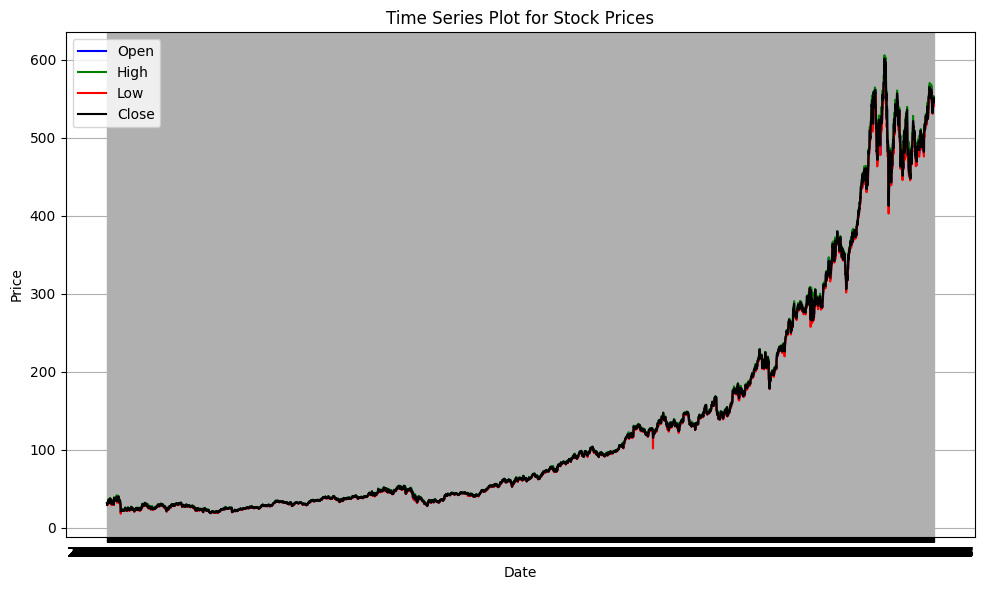

In [ ]:

#Open, High, Low & Close plot combined

plt.figure(figsize=(10,6))

plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='black')

plt.title('Time Series Plot for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


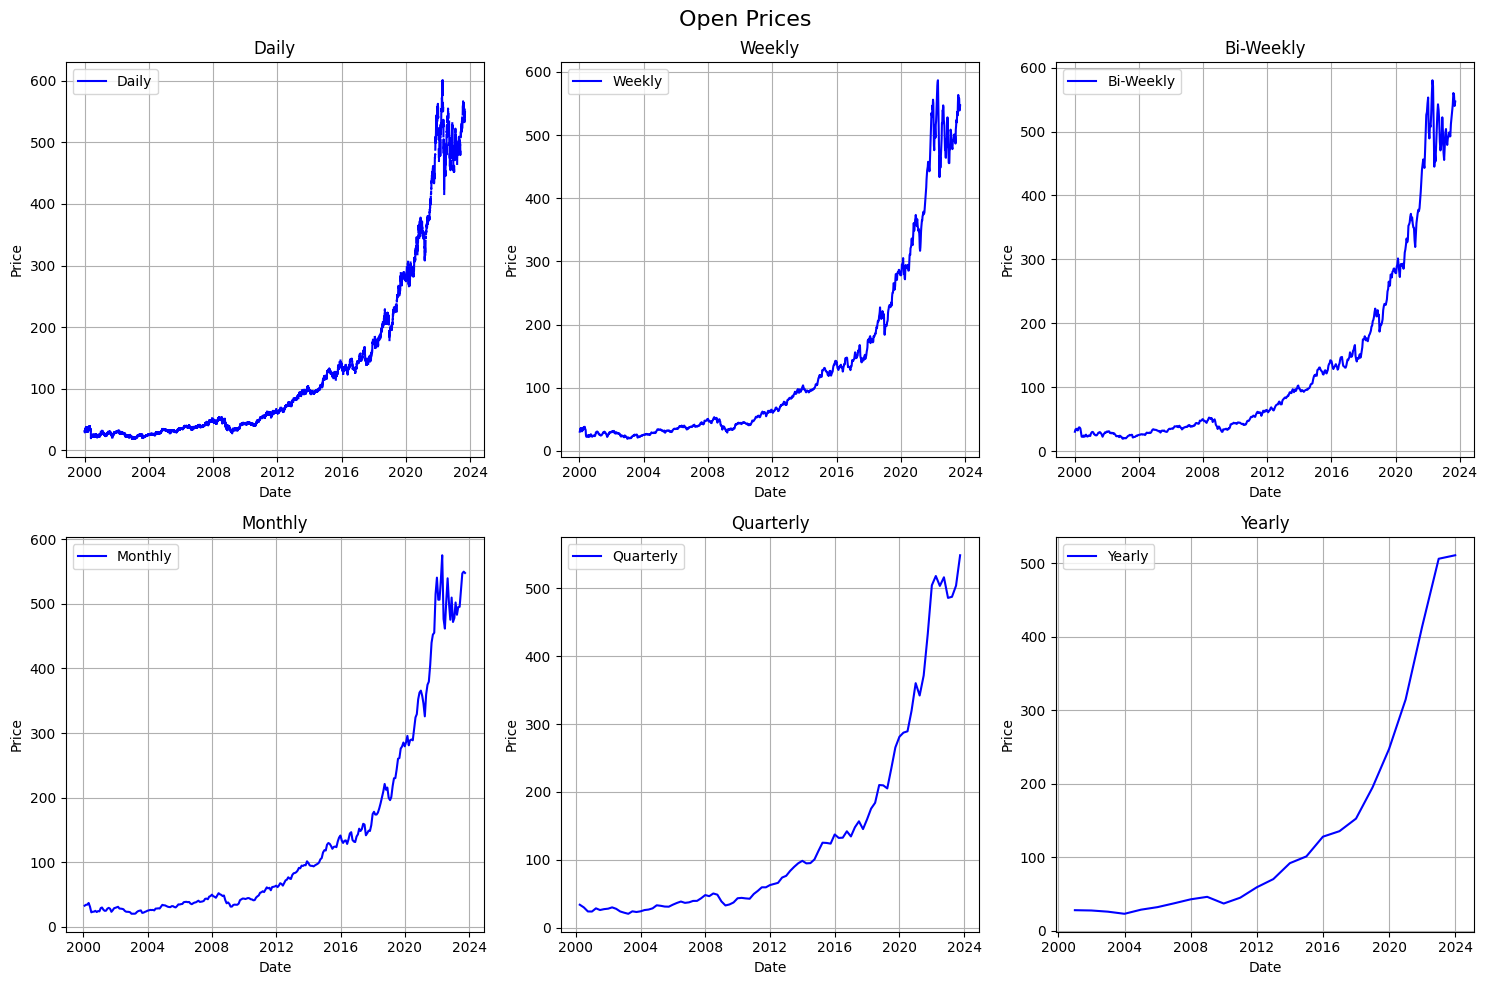

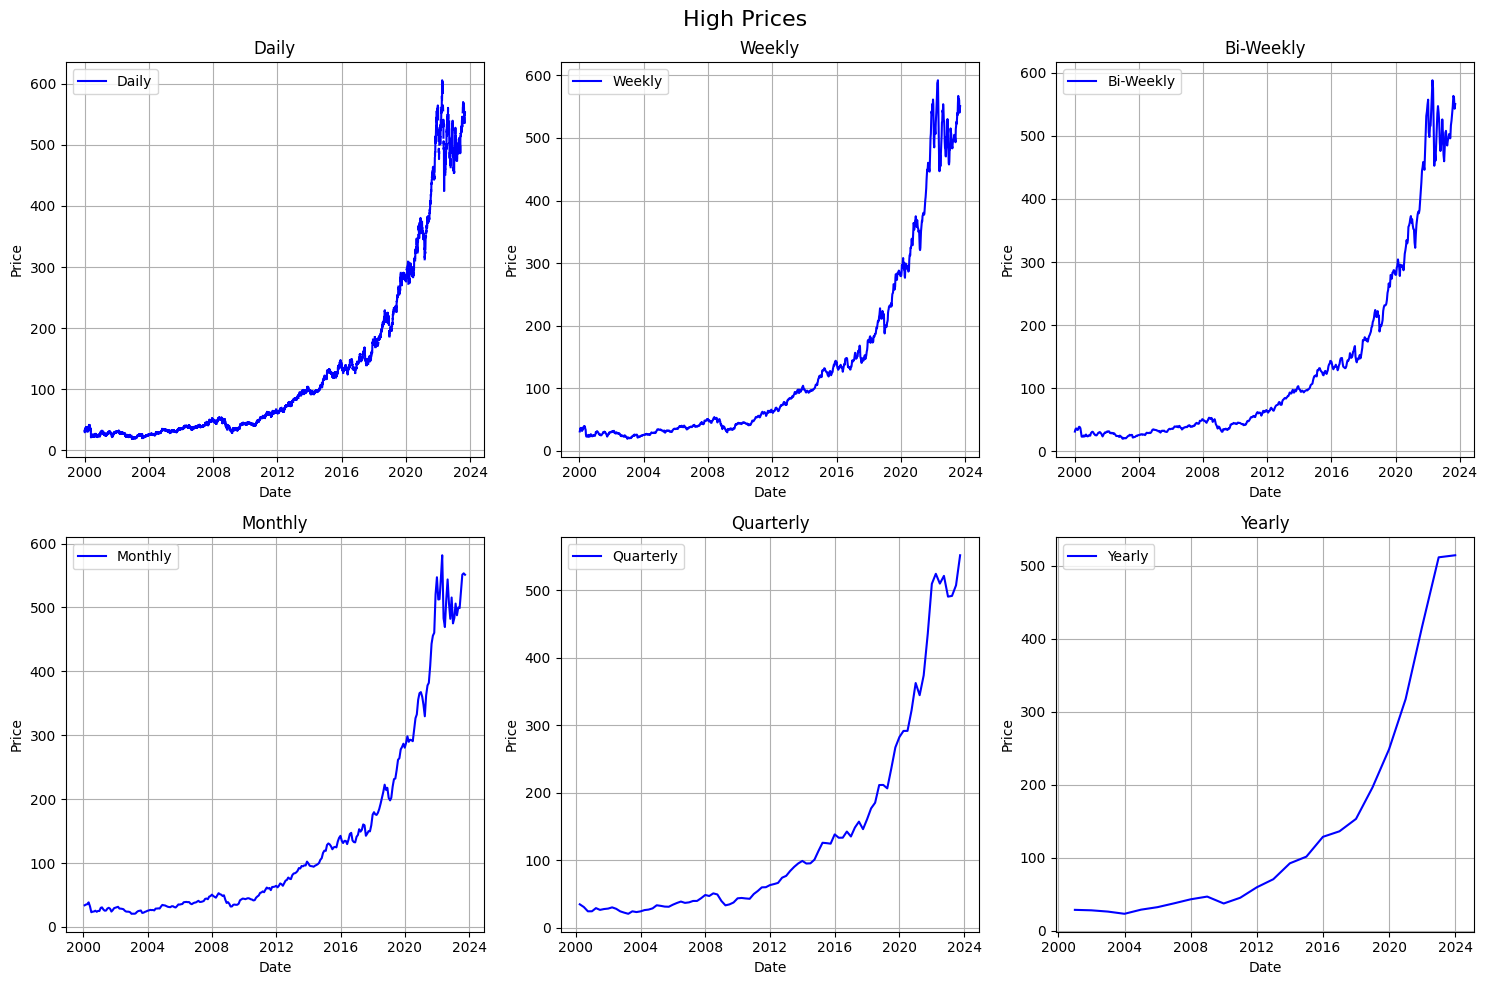

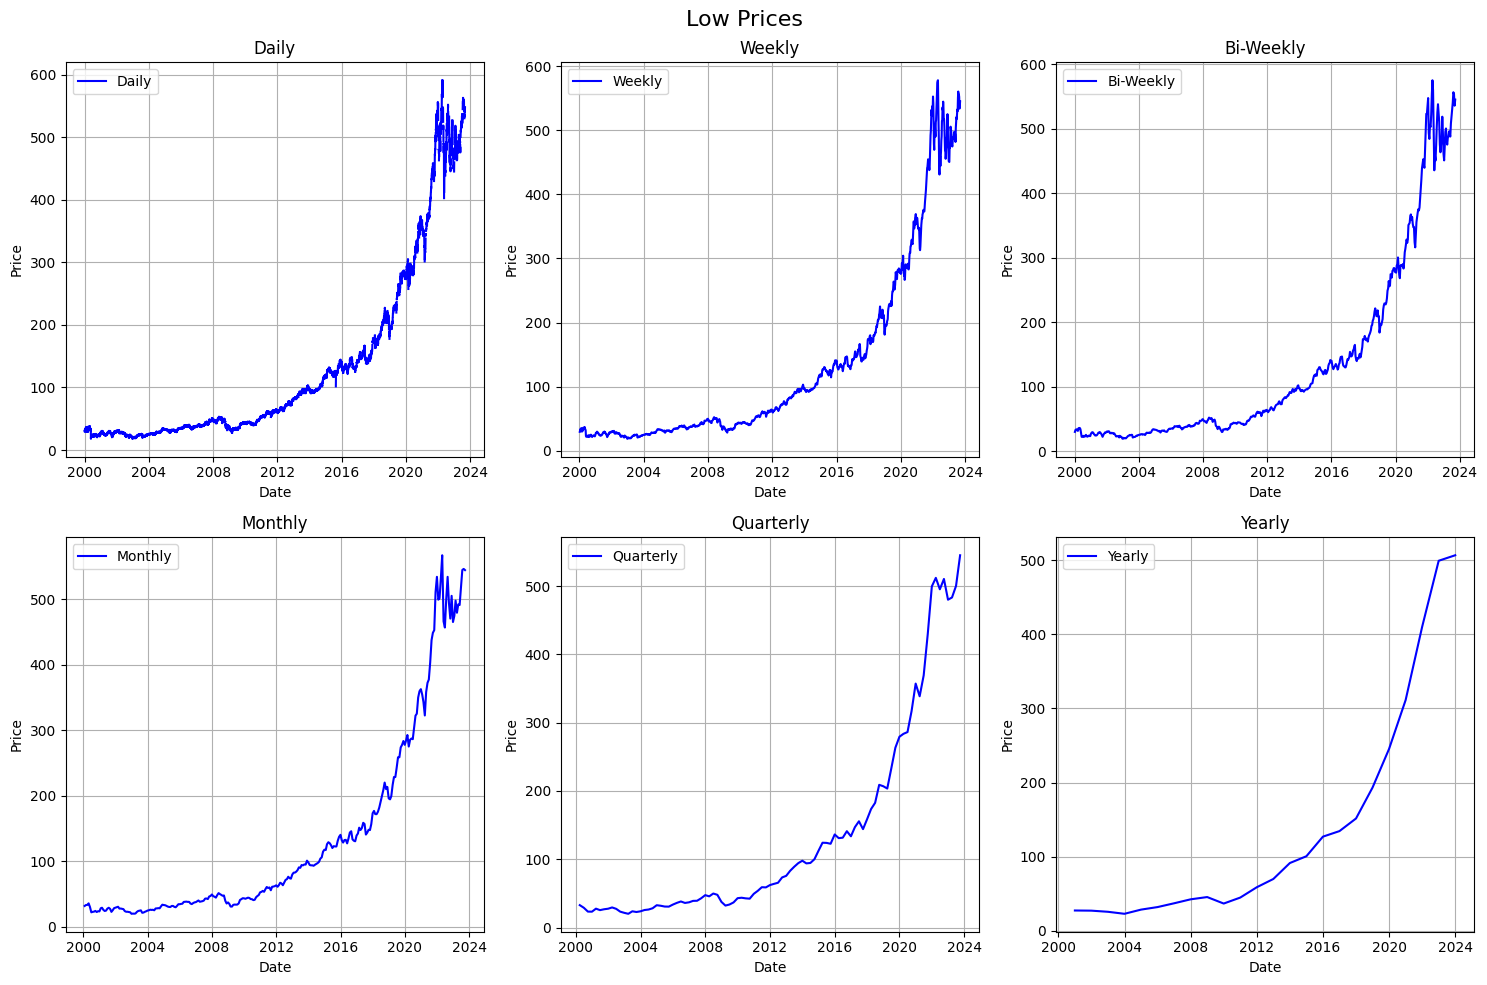

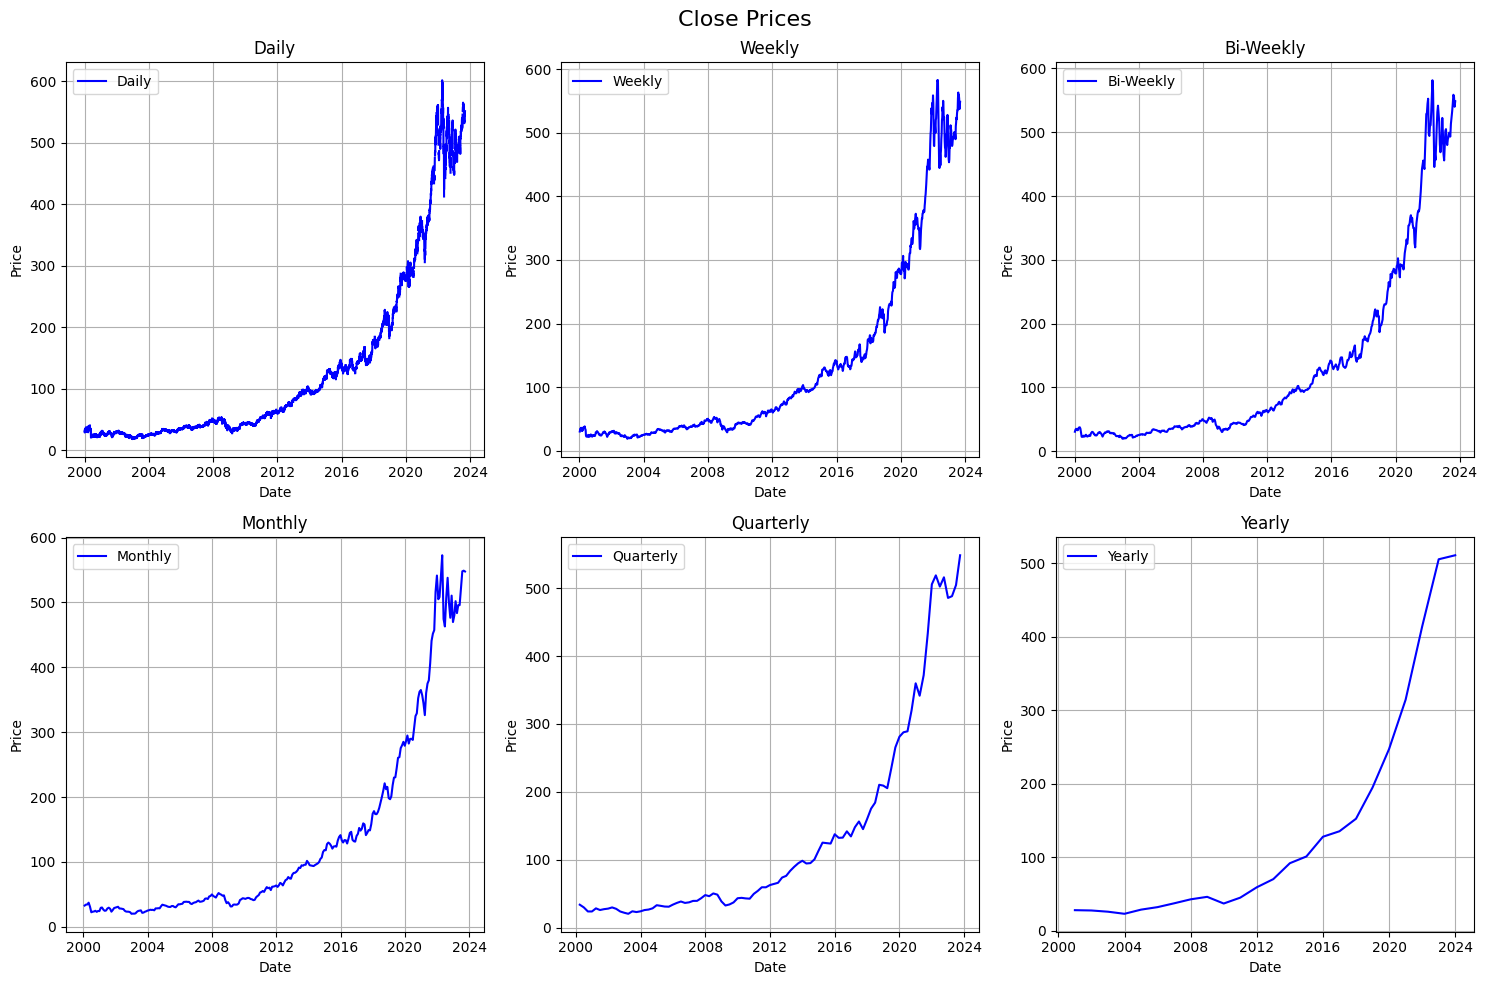

In [ ]:
#fucntion to plot each column per frequency

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

def plot_column_with_subplot(ax, df, column, freq, title):
    df_resampled = df[column].resample(freq).mean()
    ax.plot(df_resampled, label=title, color='blue')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

columns = ['Open', 'High', 'Low', 'Close']
frequencies = [
    ('D', 'Daily'),
    ('W', 'Weekly'),
    ('2W', 'Bi-Weekly'),
    ('M', 'Monthly'),
    ('Q', 'Quarterly'),
    ('A', 'Yearly')
]

for column in columns:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
    fig.suptitle(f"{column} Prices", fontsize=16)

    for ax, (freq, freq_name) in zip(axs.ravel(), frequencies):
        title = f"{freq_name}"
        plot_column_with_subplot(ax, df, column, freq, title)

plt.show()


<ipython-input-6-e50561ef3033>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()
<ipython-input-6-e50561ef3033>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()
<ipython-input-6-e50561ef3033>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()
<ipython-input-6-e50561ef3033>:2: FutureWarning: The default 

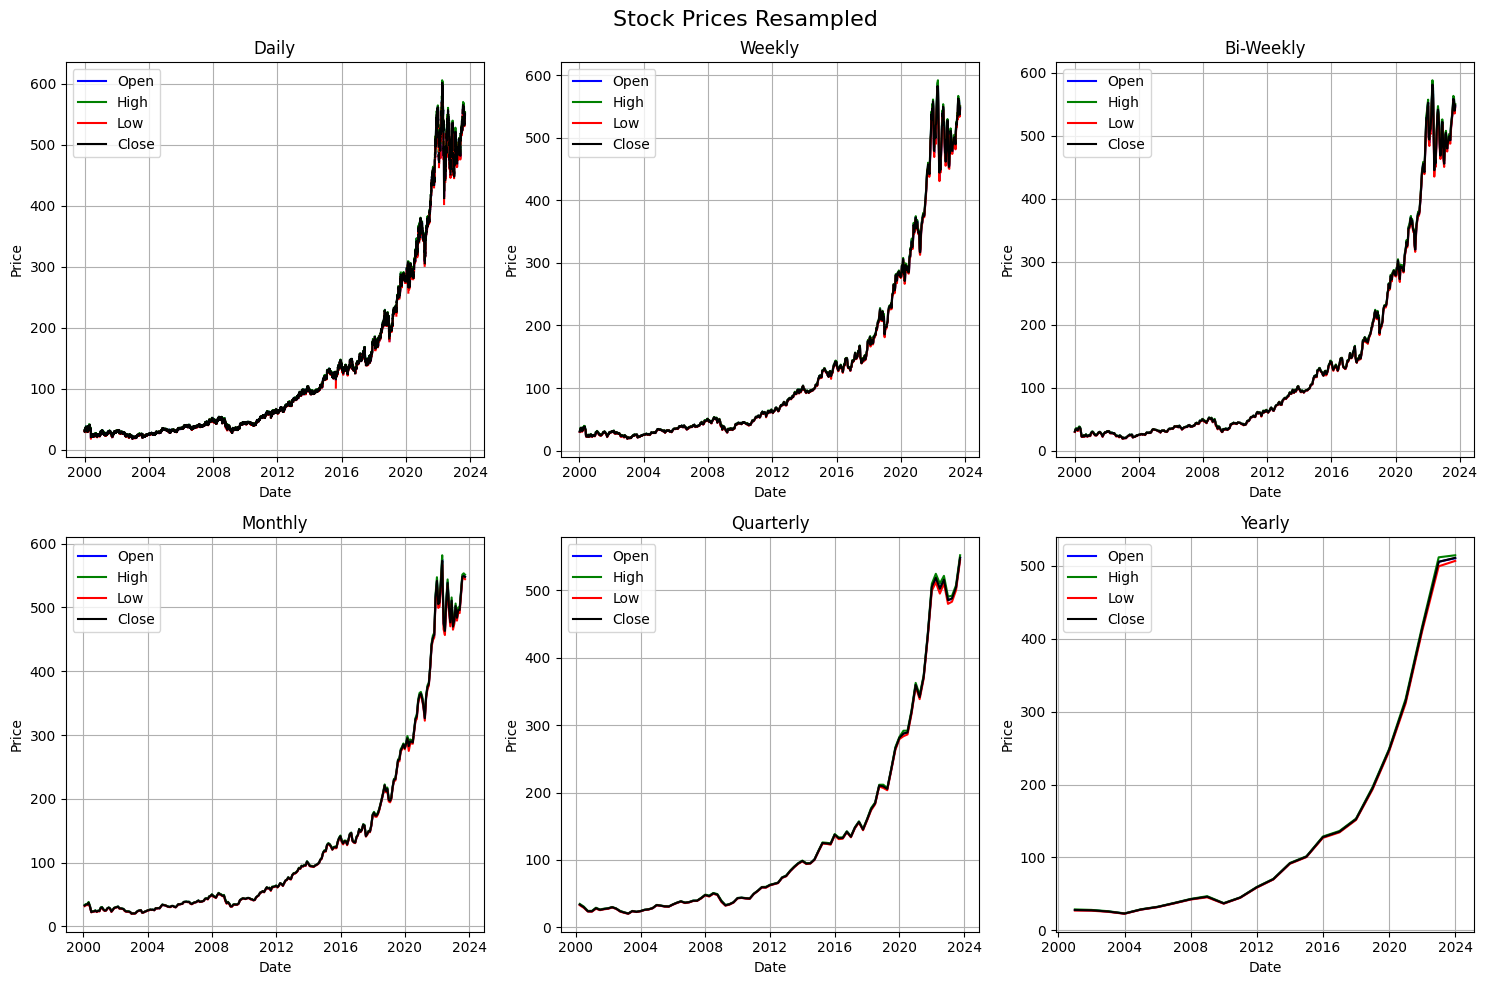

In [ ]:

def plot_combined_columns_subplot(ax, df, freq, title):
    df_resampled = df.resample(freq).mean()

    ax.plot(df_resampled['Open'], label='Open', color='blue')
    ax.plot(df_resampled['High'], label='High', color='green')
    ax.plot(df_resampled['Low'], label='Low', color='red')
    ax.plot(df_resampled['Close'], label='Close', color='black')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

frequencies = [
    ('D', 'Daily'),
    ('W', 'Weekly'),
    ('2W', 'Bi-Weekly'),
    ('M', 'Monthly'),
    ('Q', 'Quarterly'),
    ('A', 'Yearly')
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
fig.suptitle(f"Stock Prices Resampled", fontsize=16)

for ax, (freq, freq_name) in zip(axs.ravel(), frequencies):
    title = f"{freq_name}"
    plot_combined_columns_subplot(ax, df, freq, title)

plt.show()


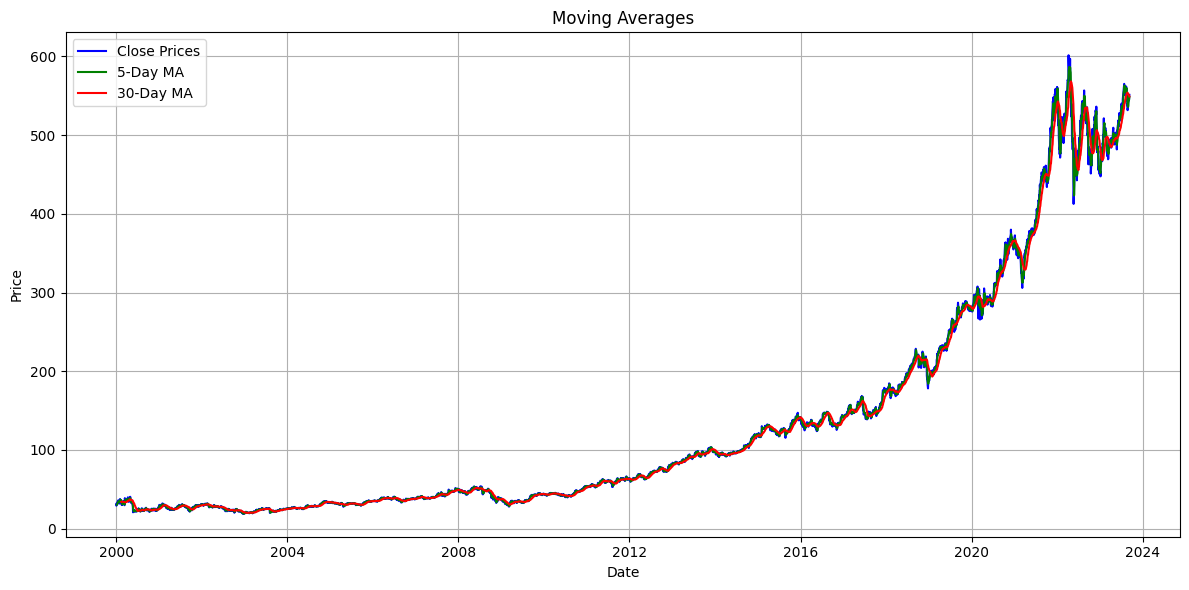

<ipython-input-7-09b3e0e27874>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


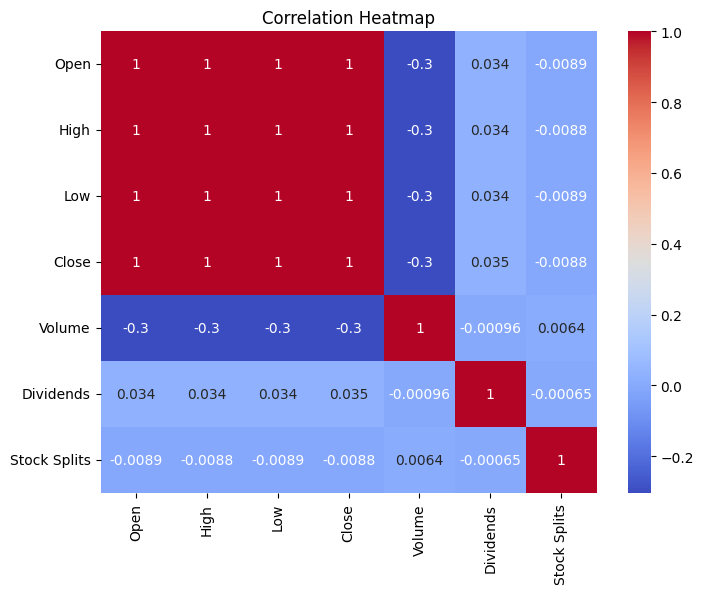

In [ ]:
import seaborn as sns

# Moving Averages
def plot_moving_average(df):
    ma_short = df['Close'].rolling(window=5).mean()  # Short term moving average
    ma_long = df['Close'].rolling(window=30).mean()  # Long term moving average

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Prices', color='blue')
    plt.plot(ma_short, label='5-Day MA', color='green')
    plt.plot(ma_long, label='30-Day MA', color='red')
    plt.title('Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_moving_average(df)

# Correlation Heatmap
def plot_corr_heatmap(df):
    correlation = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_corr_heatmap(df)


In [ ]:
pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


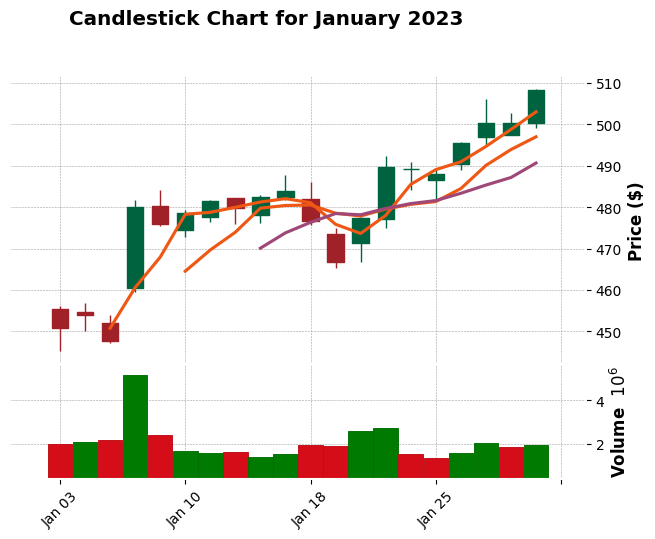

In [ ]:
import mplfinance as mpf

df_subset = df['2023-01-01':'2023-01-31']

mpf.plot(df_subset, type='candle', style='charles',
         title='Candlestick Chart for January 2023',
         ylabel='Price ($)',
         volume=True, mav=(3,6,9))


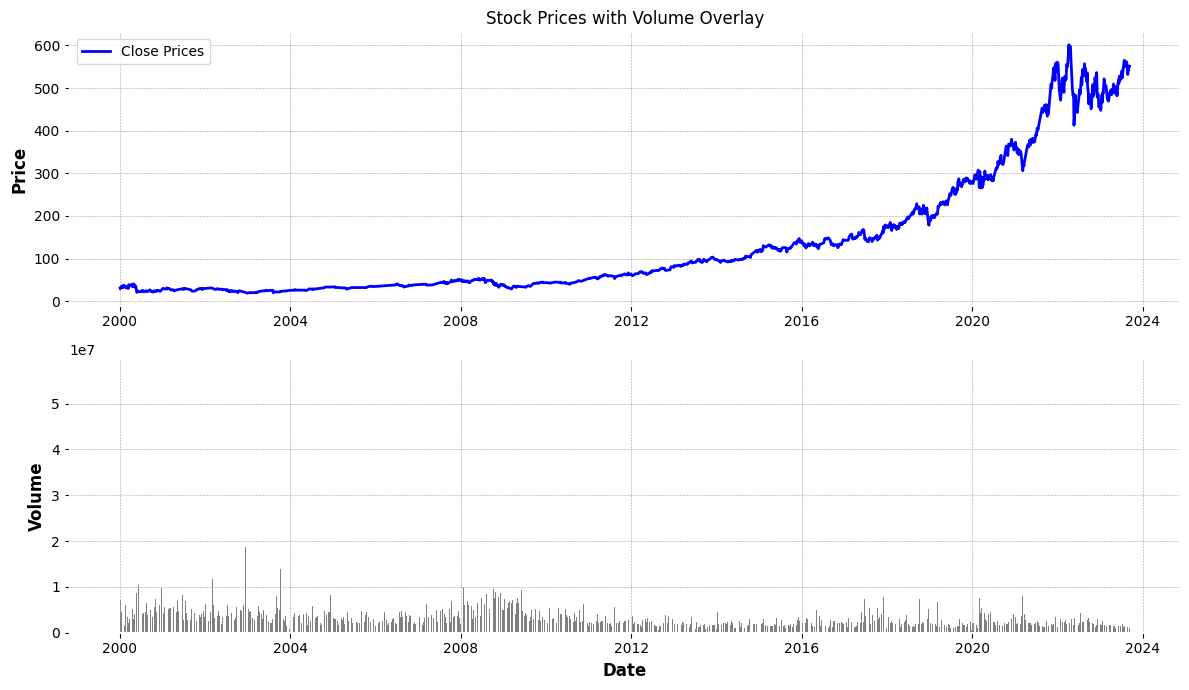

In [ ]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Prices', color='blue')
plt.title('Stock Prices with Volume Overlay')
plt.ylabel('Price')
plt.legend()


plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='grey')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


<ipython-input-12-878fabedd092>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_returns, bins=50, hist=True, kde=True, color='blue')


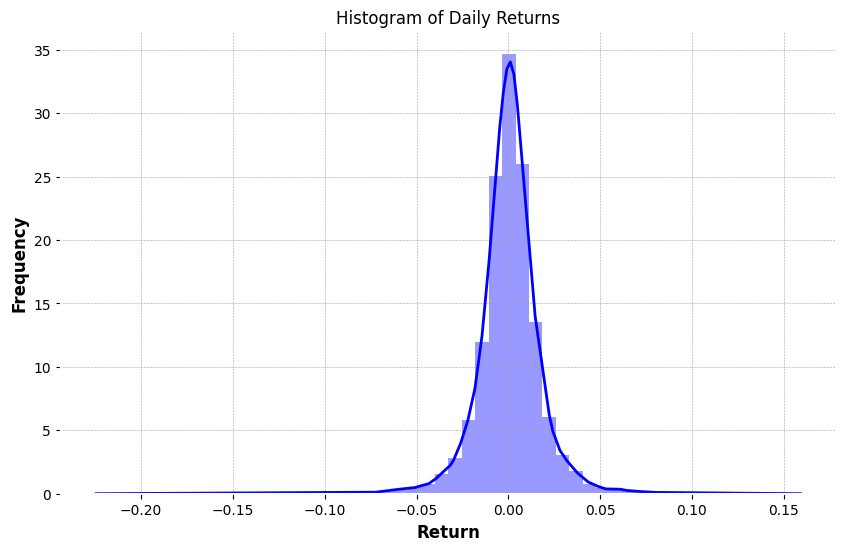

In [ ]:

daily_returns = df['Close'].pct_change().dropna()

plt.figure(figsize=(10, 6))
sns.distplot(daily_returns, bins=50, hist=True, kde=True, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


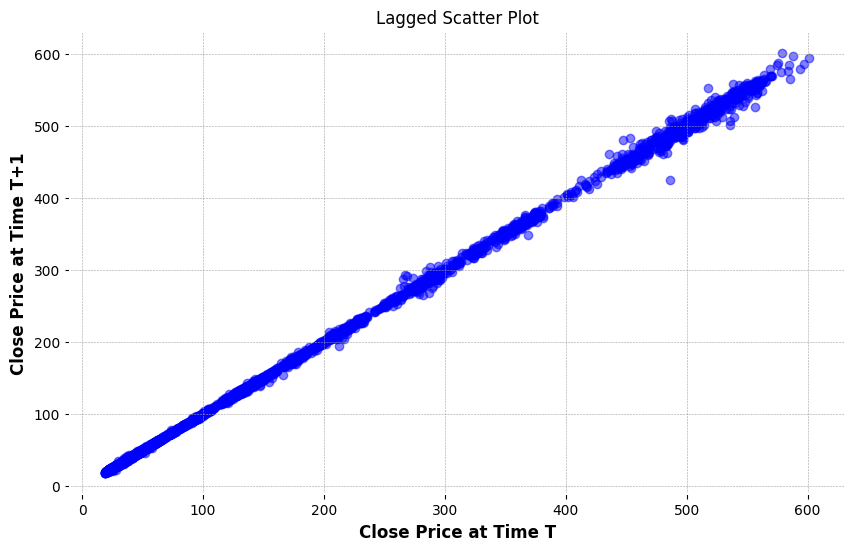

In [ ]:
lag = df['Close'].shift(-1)

plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], lag, alpha=0.5, color='blue')
plt.title('Lagged Scatter Plot')
plt.xlabel('Close Price at Time T')
plt.ylabel('Close Price at Time T+1')
plt.grid(True)
plt.show()


In [ ]:
unique_counts = df['Time'].value_counts().unique()
print(unique_counts)


[3788 2172]


In [ ]:
dates_with_two_unique_times = df.groupby('Date')['Time'].nunique()
dates_with_two_unique_times = dates_with_two_unique_times[dates_with_two_unique_times == 2].index.tolist()

print(dates_with_two_unique_times)


[]


In [ ]:
unique_times_per_date = df.groupby('Date')['Time'].nunique()

print(unique_times_per_date)


Date
2000-01-03    1
2000-01-04    1
2000-01-05    1
2000-01-06    1
2000-01-07    1
             ..
2023-09-01    1
2023-09-05    1
2023-09-06    1
2023-09-07    1
2023-09-08    1
Name: Time, Length: 5959, dtype: int64


Epoch 1/100
75/75 - 2s - loss: 0.0029 - 2s/epoch - 29ms/step
Epoch 2/100
75/75 - 0s - loss: 7.1373e-06 - 253ms/epoch - 3ms/step
Epoch 3/100
75/75 - 0s - loss: 5.3149e-06 - 258ms/epoch - 3ms/step
Epoch 4/100
75/75 - 0s - loss: 5.2323e-06 - 261ms/epoch - 3ms/step
Epoch 5/100
75/75 - 0s - loss: 5.1217e-06 - 242ms/epoch - 3ms/step
Epoch 6/100
75/75 - 0s - loss: 4.9912e-06 - 239ms/epoch - 3ms/step
Epoch 7/100
75/75 - 0s - loss: 4.8310e-06 - 265ms/epoch - 4ms/step
Epoch 8/100
75/75 - 0s - loss: 4.8094e-06 - 250ms/epoch - 3ms/step
Epoch 9/100
75/75 - 0s - loss: 4.6693e-06 - 240ms/epoch - 3ms/step
Epoch 10/100
75/75 - 0s - loss: 4.5775e-06 - 249ms/epoch - 3ms/step
Epoch 11/100
75/75 - 0s - loss: 4.4256e-06 - 256ms/epoch - 3ms/step
Epoch 12/100
75/75 - 0s - loss: 4.3465e-06 - 255ms/epoch - 3ms/step
Epoch 13/100
75/75 - 0s - loss: 4.3242e-06 - 248ms/epoch - 3ms/step
Epoch 14/100
75/75 - 0s - loss: 4.4377e-06 - 254ms/epoch - 3ms/step
Epoch 15/100
75/75 - 0s - loss: 4.2518e-06 - 265ms/epoch - 4ms/

Exception ignored in: <function _xla_gc_callback at 0x78f045136830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


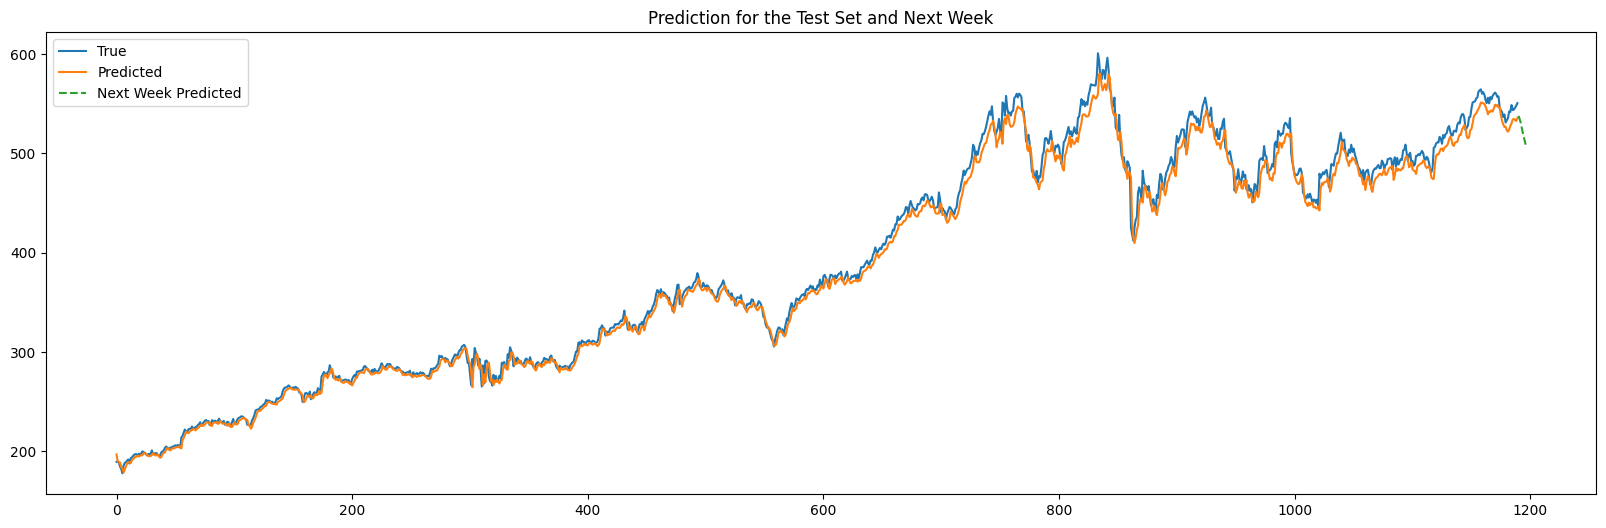

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error



# Drop unnecessary columns
# df = df.drop(columns=['Time', 'Volume', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits'])

# Using Date, Open, High, Low, Close columns
data_to_use = df[['Open', 'High', 'Low', 'Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_to_use)

train_size = int(len(normalized_data) * 0.8)
test_size = len(normalized_data) - train_size
train, test = normalized_data[0:train_size, :], normalized_data[train_size:len(normalized_data), :]

# Modify create_dataset to handle multiple features
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), :])
        dataY.append(dataset[i + look_back, -1])  # Close price is the last column
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(LSTM(200, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(np.c_[trainPredict, np.zeros(trainPredict.shape), np.zeros(trainPredict.shape), np.zeros(trainPredict.shape)])[:,0]
trainY_original = scaler.inverse_transform(np.c_[trainY, np.zeros(trainY.shape), np.zeros(trainY.shape), np.zeros(trainY.shape)])[:,0]
testPredict = scaler.inverse_transform(np.c_[testPredict, np.zeros(testPredict.shape), np.zeros(testPredict.shape), np.zeros(testPredict.shape)])[:,0]
testY_original = scaler.inverse_transform(np.c_[testY, np.zeros(testY.shape), np.zeros(testY.shape), np.zeros(testY.shape)])[:,0]

# Predict for next 7 days
last_known_data = normalized_data[-look_back:]
predictions = []

for _ in range(7):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

# Calculate RMSE for train and test
trainScore = np.sqrt(mean_squared_error(trainY_original, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_original, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting predictions for the test set and the next week
plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(testY_original)), testY_original, label="True")
plt.plot(np.arange(len(testPredict)), testPredict, label="Predicted")
plt.plot(np.arange(len(testPredict), len(testPredict) + 7), next_week_predictions, label="Next Week Predicted", linestyle='--')
plt.legend()
plt.title("Prediction for the Test Set and Next Week")
plt.show()
